# ------------------------------------- CLASSIFICATION TASK --------------------------------------

# CHURN

Churn Prediction is quite important in Telcom and churn rates is one of thier business metrics as the cost involved in retaining an existing customer is much lesser than acquiring a new customer. So this data is about predicting if a customer will churn based on the characteristics that they posses

# Part 1

# Importing packages, Reading Data

In [1]:
import numpy as np 
import pandas as pd
#Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Telco_Customer_Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,NaN,Yes


# Part 2

# Data Cleaning & Exploration 

In [3]:
print("--------------------Summary of Dataset--------------------")
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\n Features :",data.columns.tolist())
print ("\n Missing values : ", data.isnull().sum().values.sum())
print ("\n Unique values : \n",data.nunique())

--------------------Summary of Dataset--------------------
Rows     :  7043
Columns  :  21

 Features : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

 Missing values :  439

 Unique values : 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1576
TotalCharges        6387
Churn                  2
dty

In [4]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / len(data)).sort_values(ascending = False)
percent = percent*100
missingData = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
missingData.head(5)

,Total,Percent
TotalCharges,160,2.271759
MonthlyCharges,126,1.789010
Contract,106,1.505040
PaperlessBilling,47,0.667329
Churn,0,0.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            6937 non-null object
PaperlessBilling    6996 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      6917 non-null float64
TotalCharges        6883 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,6917.000000
mean,0.162147,32.371149,64.777071
std,0.368612,24.559481,30.088598
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Manupulation

Replacing the blank values with NaN

In [7]:
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)
data['MonthlyCharges'] = data["MonthlyCharges"].replace(" ",np.nan)

Converting Totalcharges from str to float for further calculations

In [8]:
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,6917.000000,6872.000000
mean,0.162147,32.371149,64.777071,2287.245991
std,0.368612,24.559481,30.088598,2269.817205
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,403.300000
50%,0.000000,29.000000,70.350000,1398.975000
75%,0.000000,55.000000,89.850000,3802.075000
max,1.000000,72.000000,118.750000,8684.800000


Handling the missing data in TotalCharges and Monthly Charges column. On seeing the dataset, it was understood that, TotalChargers are approximately MonthlyCharges multiplied by the tenure. Hence the missing data for TotalCharges/Monthly Charges has been handled correspondinly

In [10]:
for index, row in data.iterrows():
    if(pd.isna(row['TotalCharges']) ):
        data['TotalCharges'][index]= row['MonthlyCharges']*row['tenure']

for index, row in data.iterrows():
    if(pd.isna(row['MonthlyCharges'])):
        data['MonthlyCharges'][index]= row['TotalCharges']/row['tenure']

Grouping Contract and Tenure to see if there is any relationship

In [11]:
data[['Contract', 'tenure' ]].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.021660
One year,41.965132
Two year,56.700180


Handling the missing data in Contract coloumn by assigning "Month-to-month" to missing contract field if the tenure is less than 18 months and similarly if the tenure is between 18 and 42, it has been assigned "One Year" and those which are greater are assigned "Two year"

In [12]:
for index, row in data.iterrows():
    if(pd.isna(row['Contract'])):
        if row['tenure'] < 18:
            data['Contract'][index] = 'Month-to-month'
        elif row['tenure'] >=18 and row['tenure'] < 42:
            data['Contract'][index] = 'One year'
        elif row['tenure'] >=42:
            data['Contract'][index] = 'Two year'

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    6996 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7041 non-null float64
TotalCharges        7041 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [14]:
data.PaperlessBilling.unique()

array(['Yes', 'No', nan], dtype=object)

Dropping null values from columns having missing data 

In [15]:
data = data[data["PaperlessBilling"].notnull()]
data = data[data["MonthlyCharges"].notnull()]
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

Getting the list of unique values for the columns

In [16]:
l = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']
for i in l:
     print(data[i].unique())

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


Replace No Internet Service feilds to No in the coloumns in list

In [17]:
for i in l : 
    data[i]  = data[i].replace({'No internet service' : 'No'})

Making the tenure coloumn to be categorical column for further analysis. This helps to get an understand the relationship of columns with Tenure

In [18]:
def tenure_function(data) :
    
    if data["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24):
        return "Tenure_12-24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 48):
        return "Tenure_24-48"
    elif (data["tenure"] > 48) & (data["tenure"] <= 60):
        return "Tenure_48-60"
    elif data["tenure"] > 60 :
        return "Tenure_gt_60"
data["tenure_group"] = data.apply(lambda data:tenure_function(data),axis = 1)

Assigning churn and non churn customers to the respective variables

In [19]:
churn     = data[data["Churn"] == "Yes"]
not_churn = data[data["Churn"] == "No"]

In [20]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes,Tenure_0-12
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Tenure_0-12
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,Tenure_12-24
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,Tenure_0-12
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Electronic check,104.80,3046.05,Yes,Tenure_24-48
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,Two year,No,Bank transfer (automatic),56.15,3487.95,No,Tenure_gt_60


### Exploratory Data Analysis

#### Churn Distribution in Data

In [21]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

lab = data["Churn"].value_counts().keys().tolist()
val = data["Churn"].value_counts().values.tolist()

pie = go.Pie(labels = lab,values = val,marker = dict(colors =  ['royalblue' ,'grey']))
layout = go.Layout(dict(title = "Churn Distribution"))

viz_data = [pie]
fig = go.Figure(data = viz_data,layout = layout)
py.iplot(fig)



#### Distrubtion of Customer Churn for the Categorical columns

In [22]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
def pie_charts(column) :
    
    Pie_Churn = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers"
                   )
    Pie_Nochurn = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    domain  = dict(x = [.52,1]),
                    name    = "Non churn customers" 
                   )

    layout = go.Layout(dict(title = column + "Distrubtion of Customer Churn"))
    viz_data = [Pie_Churn,Pie_Nochurn]
    fig  = go.Figure(data = viz_data,layout = layout)
    py.iplot(fig)

In [23]:
#for all categorical columns plot pie
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
for i in cat_cols :
    pie_charts(i)

Side by side bar Charts for the Distrubtion of Customer Churn for Tenure_groups we had created

In [24]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
tenure_churn =  churn["tenure_group"].value_counts().reset_index()
tenure_churn.columns  = ["tenure_group","count"]
tenure_Nochurn = not_churn["tenure_group"].value_counts().reset_index()
tenure_Nochurn.columns = ["tenure_group","count"]

Bar_Churn = go.Bar(x = tenure_churn["tenure_group"]  , y = tenure_churn["count"],
                name = "Churn Customers",opacity = .9)

Bar_NoChurn = go.Bar(x = tenure_Nochurn["tenure_group"] , y = tenure_Nochurn["count"],
                name = "Non Churn Customers",opacity = .9)

layout = go.Layout(dict(title = "Customer attrition in tenure groups",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Tenure group",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                         yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2)))
viz_data = [Bar_Churn,Bar_NoChurn]
fig  = go.Figure(data=viz_data,layout=layout)
py.iplot(fig)

These visulaizations gives us a bit of the understanding of what is affecting churn. For example, from the pie charts, we can see that Gender doesnt helps us figure out if a customer churns, whereas the variable PhoneService distrubtions has a significant contirbution in finidng out the customer churn. Similarly, these side Bar charts, help us understand that people who stay for more than 60 months churn a little and those whose tenure is less than 12, likly churn.

# Part 3

# Data preprocessing & Feature Engineering
## Scaling the data

Scaling the data before we move into modelling. We have used minmax scaler for scaling. From the describe tabulation above, we see that the standard deviation and mean for the features are relatively close, i.e small standard deviation. MinMax scaler has been used to get all the data in the columns between 0 and 1. This helps in avoid any features to dominate the model.

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Getting the data in thier respective data type column
ID     = ['customerID']
Target = ['Churn']
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
Binary_col  = data.nunique()[data.nunique() == 2].keys().tolist()
catagorical_col = []
numerical_col = []
Multiple_category_cols = []
for x in cat_cols:
    if x not in Target:
        catagorical_col.append(x)
for x in data.columns:
    if x not in Target+ID+cat_cols:
        numerical_col.append(x)
for x in catagorical_col:
    if x not in Binary_col:
        Multiple_category_cols.append(x)    
        
#Label encoding Binary columns
le = LabelEncoder()
for i in Binary_col :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = Multiple_category_cols )

#Scaling Numerical columns
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[numerical_col])
scaled = pd.DataFrame(scaled,columns=numerical_col)


#dropping original values merging scaled values for numerical columns
df_telcom_og = data.copy()
data = data.drop(columns = numerical_col,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")


# Part 4

# Classification : Models

The following classification has been used for the dataset
* Logistic Regression
* K Nearest Neighbor
* Decision Tree  
* Linear SVM
* RBF Kernal SVM
* Poly Kernal SVM
  


Here, we are considering F1 score for evaluation as good F1 score states that there is low false positives and low false negatives, So for a Churn model, we need to indentify most of the churning customers



In [26]:
from sklearn.model_selection import train_test_split
cols    = [i for i in data.columns if i not in ID+Target]
X = data[cols]
Y = data[Target]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = .25,random_state = 0)

# 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
logreg = LogisticRegression(penalty='l2',random_state=0)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_log_reg = GridSearchCV(LogisticRegression(penalty='l2',random_state=0),param_grid,cv=3)
grid_log_reg.fit(X_train, y_train)
scores = cross_val_score(logreg,X_train,y_train)



In [28]:
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Logistic Regression Training Score: ", grid_log_reg.score(X_train, y_train))
print("Logistic Regression Testing Score: ", grid_log_reg.score(X_test, y_test))
print("Best Parameters for Logistic Regression: ", grid_log_reg.best_params_)
cv_logit = "Average cross-validation score: {:.2f}".format(scores.mean())
param_logit = grid_log_reg.best_params_


Cross-validation scores: [0.8004574  0.80263158 0.80377574]
Average cross-validation score: 0.80
Logistic Regression Training Score:  0.8062917063870353
Logistic Regression Testing Score:  0.8090337335620355
Best Parameters for Logistic Regression:  {'C': 1}


In [29]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LogisticRegression(C=alpha, random_state=0)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5, 0, 'C')

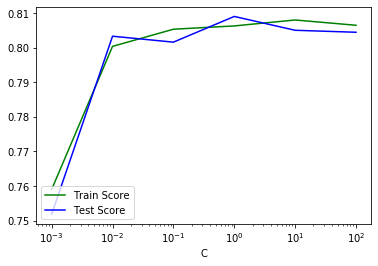

In [30]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

Regularization parameter: 1 and penalty l2 seems to give us a better accuracy

In [31]:
logit = LogisticRegression(penalty = 'l2', C = 1, random_state=0)
logit.fit(X_train, y_train)
logit_predict = logit.predict(X_test)


In [32]:
print(classification_report(y_test,logit_predict))
lr = classification_report(y_test,logit_predict)



              precision    recall  f1-score   support

           0       0.85      0.91      0.87      1285
           1       0.67      0.54      0.60       464

    accuracy                           0.81      1749
   macro avg       0.76      0.72      0.74      1749
weighted avg       0.80      0.81      0.80      1749



# 2. KNN Classifier


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 20)}
grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 3)
grid_knn.fit(X_train, y_train)
scores = cross_val_score(knn,X_train,y_train)

In [34]:
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("KNN Training Score: ",grid_knn.score(X_train, y_train))
print("KNN Testing Score: ", grid_knn.score(X_test, y_test))
print("KNN Best Parameters: ", grid_knn.best_params_)
cv_Knn = "Average cross-validation score: {:.2f}".format(scores.mean())
param_Knn = grid_knn.best_params_

Cross-validation scores: [0.77015437 0.77173913 0.76659039]
Average cross-validation score: 0.77
KNN Training Score:  0.8099142040038132
KNN Testing Score:  0.7930245854774156
KNN Best Parameters:  {'n_neighbors': 18}


In [35]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

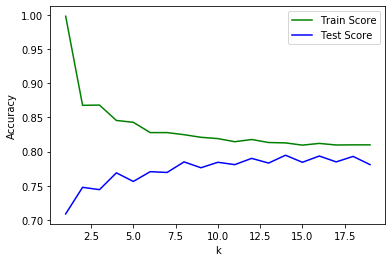

In [36]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

K Value of 18 seems to give us a better accuracy

In [37]:
knn = KNeighborsClassifier(18)
knn.fit(X_train, y_train)
Knn_predict = knn.predict(X_test)


In [38]:
print(classification_report(y_test,Knn_predict))
knb = classification_report(y_test,Knn_predict)


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1285
           1       0.64      0.51      0.57       464

    accuracy                           0.79      1749
   macro avg       0.74      0.70      0.72      1749
weighted avg       0.78      0.79      0.79      1749



# 3. Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': np.arange(6, 15)}
dt = DecisionTreeClassifier(random_state=0)
grid_tree = GridSearchCV(dt, param_grid,cv = 3)
grid_tree.fit(X_train, y_train)
scores = cross_val_score(dt,X_train,y_train)


In [40]:
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Decision Tree Training Score: ", grid_tree.score(X_train, y_train))
print("Decision Tree Testing Score: ", grid_tree.score(X_test, y_test))
print("Decision Tree Best Parameters : ", grid_tree.best_params_)
cv_dtree = "Average cross-validation score: {:.2f}".format(scores.mean())
param_dtree = grid_tree.best_params_

Cross-validation scores: [0.72498571 0.74370709 0.71224256]
Average cross-validation score: 0.73
Decision Tree Training Score:  0.8120114394661583
Decision Tree Testing Score:  0.7747284162378502
Decision Tree Best Parameters :  {'max_depth': 6}


In [41]:
from sklearn.tree import DecisionTreeClassifier

train_score_list = []
test_score_list = []
x_range = np.arange(6, 15)

for alpha in x_range: 
    model = DecisionTreeClassifier(max_depth=alpha, random_state=0)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5, 0, 'Max Depth')

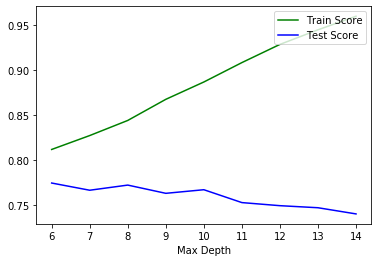

In [42]:
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('linear')
plt.legend(loc = 1)
plt.xlabel('Max Depth')



 Max Depth of 6 gives us better accuracy

In [43]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=0)
dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)


In [44]:
print(classification_report(y_test,dtree_predict))
dectree = classification_report(y_test,dtree_predict)



              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1285
           1       0.59      0.51      0.55       464

    accuracy                           0.77      1749
   macro avg       0.71      0.69      0.70      1749
weighted avg       0.77      0.77      0.77      1749



# 4. Linear SVM

In [45]:
from sklearn.svm import LinearSVC
svc_lin = LinearSVC(random_state=0)
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 3)
grid_svc_lin.fit(X_train, y_train)
scores = cross_val_score(svc_lin,X_train,y_train)

In [46]:
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Linear SVC Training Score: ", grid_svc_lin.score(X_train, y_train))
print("Linear SVC Testing Score: ",grid_svc_lin.score(X_test, y_test))
print("Linear SVC Best Parameters: ", grid_svc_lin.best_params_)
cv_svc_lin = "Average cross-validation score: {:.2f}".format(scores.mean())
param_svc_lin = grid_svc_lin.best_params_

Cross-validation scores: [0.80102916 0.79977117 0.80549199]
Average cross-validation score: 0.80
Linear SVC Training Score:  0.8059103908484271
Linear SVC Testing Score:  0.8073184676958262
Linear SVC Best Parameters:  {'C': 10}


In [47]:
from sklearn.svm import LinearSVC   
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LinearSVC(C=alpha)
    model.fit(X_train, y_train)
    train_score_list.append(model.score(X_train, y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5, 0, 'C')

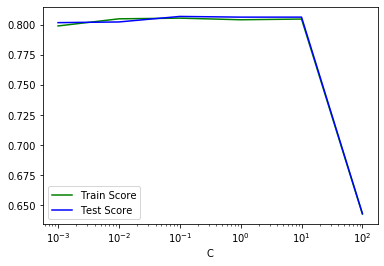

In [48]:
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

Value of C being 10 gives us better accuracy

In [49]:
LSVC_model = LinearSVC(C=10,random_state=0)
LSVC_model.fit(X_train, y_train)
LSVC_model_predict = LSVC_model.predict(X_test)


In [50]:
print(classification_report(y_test,LSVC_model_predict))
lsvm = classification_report(y_test,LSVC_model_predict)


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1285
           1       0.67      0.53      0.59       464

    accuracy                           0.81      1749
   macro avg       0.76      0.72      0.73      1749
weighted avg       0.80      0.81      0.80      1749



# 5. RBF Kernal SVM


In [51]:
from sklearn.svm import SVC
kernel = SVC(kernel='rbf',random_state=0)
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.1,0,0.1,10]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_kernel = GridSearchCV(kernel, param_grid, cv = 3)
grid_kernel.fit(X_train, y_train)
scores = cross_val_score(kernel,X_train,y_train)

In [52]:
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("RBF Kernalized SVM Training Score: ", grid_kernel.score(X_train, y_train))
print("RBF Kernalized SVM Testing Score: ", grid_kernel.score(X_test, y_test))
print("RBF Kernalized SVM Best Parameters : ", grid_kernel.best_params_)
cv_rbf = "Average cross-validation score: {:.2f}".format(scores.mean())
param_rbf = grid_kernel.best_params_

Cross-validation scores: [0.79931389 0.79176201 0.78947368]
Average cross-validation score: 0.79
RBF Kernalized SVM Training Score:  0.8099142040038132
RBF Kernalized SVM Testing Score:  0.8021726700971984
RBF Kernalized SVM Best Parameters :  {'C': 1, 'gamma': 0.1}


In [53]:
from sklearn.svm import SVC
kernel = SVC(kernel='rbf',random_state=0)
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = SVC(kernel='rbf',C = alpha, gamma= 0.1)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5, 0, 'C')

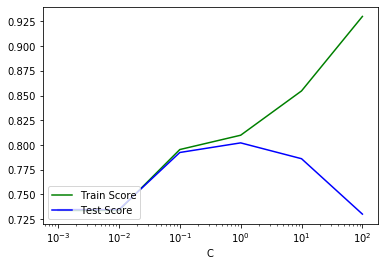

In [54]:
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

Value of C being 1 gives us better accuracy

In [55]:
rbf_model = SVC(kernel='rbf',C = 1,random_state=0, gamma= 0.1)
rbf_model.fit(X_train,y_train)
rbf_model_predict = rbf_model.predict(X_test)

In [56]:
print(classification_report(y_test,rbf_model_predict))
rbfsvm= classification_report(y_test,rbf_model_predict)


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1285
           1       0.69      0.47      0.56       464

    accuracy                           0.80      1749
   macro avg       0.76      0.70      0.71      1749
weighted avg       0.79      0.80      0.79      1749



# 6. Poly Kernal SVM

In [57]:
from sklearn.svm import SVC
kernel = SVC(kernel='poly',random_state=0)
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
deg = [2,3,4,5,6,7,8,9,10]
param_grid = {'C': Cs, 'degree' : deg}

grid_kernel = GridSearchCV(kernel, param_grid, cv = 3)
grid_kernel.fit(X_train, y_train)
scores = cross_val_score(kernel,X_train,y_train)

In [58]:
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Poly Kernalized SVM Training Score: ", grid_kernel.score(X_train, y_train))
print("Poly Kernalized SVM Testing Score: ", grid_kernel.score(X_test, y_test))
print("Poly Kernalized SVM Best Parameters: ", grid_kernel.best_params_)
cv_poly = "Average cross-validation score: {:.2f}".format(scores.mean())
param_poly = grid_kernel.best_params_

Cross-validation scores: [0.76901086 0.76258581 0.77402746]
Average cross-validation score: 0.77
Poly Kernalized SVM Training Score:  0.8009532888465205
Poly Kernalized SVM Testing Score:  0.7930245854774156
Poly Kernalized SVM Best Parameters:  {'C': 10, 'degree': 3}


In [59]:
from sklearn.svm import SVC
kernel = SVC(kernel='poly',random_state=0)
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = SVC(kernel='poly',C = alpha, degree=3)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5, 0, 'C')

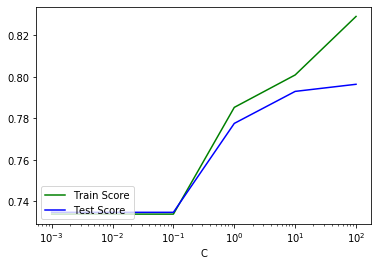

In [60]:
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

Value of C being 10 gives us better accuracy

In [61]:
poly_model = SVC(kernel='poly',C = 10, degree=3, random_state = 0)
poly_model.fit(X_train,y_train)
poly_model_predict = poly_model.predict(X_test)

In [62]:
print(classification_report(y_test,poly_model_predict))
polysvm= classification_report(y_test,poly_model_predict)


              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1285
           1       0.68      0.42      0.52       464

    accuracy                           0.79      1749
   macro avg       0.75      0.67      0.69      1749
weighted avg       0.78      0.79      0.78      1749



# Part 5

## Reports for all the models



In [63]:
print("---------------------------------------Classification Report for Logistic Regresion---------------------------------------")
print(classification_report(y_test,logit_predict))
print("---------------------------------------Confusion Matrix for Logistic Regresion--------------------------------------------")
print(confusion_matrix(y_test, logit_predict))
print("---------------------------------------Classification Report for K-Nearest Neighbors--------------------------------------")
print(classification_report(y_test,Knn_predict))
print("---------------------------------------Confusion Matrix for K-Nearest Neighbors-------------------------------------------")
print(confusion_matrix(y_test, Knn_predict))
print("---------------------------------------Classification Report for Decision Tree--------------------------------------------")
print(classification_report(y_test,dtree_predict))
print("---------------------------------------Confusion Matrix for Decision Tree-------------------------------------------------")
print(confusion_matrix(y_test, dtree_predict))
print("---------------------------------------Classification Report for Linear SVM-----------------------------------------------")
print(classification_report(y_test,LSVC_model_predict))
print("---------------------------------------Confusion Matrix for Linear SVM----------------------------------------------------")
print(confusion_matrix(y_test, LSVC_model_predict))
print("---------------------------------------Classification Report for RBF Kernal SVM-------------------------------------------")
print(classification_report(y_test,rbf_model_predict))
print("---------------------------------------Confusion Matrix for RBF Kernal SVM------------------------------------------------")
print(confusion_matrix(y_test, rbf_model_predict))
print("---------------------------------------Classification Report for Poly Kernal SVM------------------------------------------")
print(classification_report(y_test,poly_model_predict))
print("---------------------------------------Confusion Matrix for Poly Kernal SVM-----------------------------------------------")
print(confusion_matrix(y_test, poly_model_predict))



---------------------------------------Classification Report for Logistic Regresion---------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.87      1285
           1       0.67      0.54      0.60       464

    accuracy                           0.81      1749
   macro avg       0.76      0.72      0.74      1749
weighted avg       0.80      0.81      0.80      1749

---------------------------------------Confusion Matrix for Logistic Regresion--------------------------------------------
[[1164  121]
 [ 213  251]]
---------------------------------------Classification Report for K-Nearest Neighbors--------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1285
           1       0.64      0.51      0.57       464

    accuracy                           0.79      1749
   macro avg       0.74      0.70      0.72      1749
weigh

# Final Report

In [64]:
df = pd.DataFrame({"Logistic Regresion":[lr.split()[12],lr.split()[7],lr.split()[15],cv_logit.split()[3],param_logit],"K-Nearest Neighbor":[knb.split()[12],knb.split()[7],knb.split()[15],cv_Knn.split()[3],param_Knn],"Decision Tree":[dectree.split()[12],dectree.split()[7],dectree.split()[15],cv_dtree.split()[3],param_dtree],"Linear SVM":[lsvm.split()[12],lsvm.split()[7],lsvm.split()[15],cv_svc_lin.split()[3],param_svc_lin],"RBF Kernal SVM":[rbfsvm.split()[12],rbfsvm.split()[7], rbfsvm.split()[15],cv_rbf.split()[3],param_rbf],"Poly Kernal SVM":[polysvm.split()[12],polysvm.split()[7],polysvm.split()[15],cv_poly.split()[3],param_poly]})
df2 = df.T
df2.columns=['F1-Score (Churn)','F1-Score (NoChurn)','Accuracy','Avg Cross Validation Score','HyperParamters']
df2.sort_values('F1-Score (Churn)',ascending=False)

,F1-Score (Churn),F1-Score (NoChurn),Accuracy,Avg Cross Validation Score,HyperParamters
Logistic Regresion,0.60,0.87,0.81,0.80,{'C': 1}
Linear SVM,0.59,0.87,0.81,0.80,{'C': 10}
K-Nearest Neighbor,0.57,0.86,0.79,0.77,{'n_neighbors': 18}
RBF Kernal SVM,0.56,0.87,0.80,0.79,"{'C': 1, 'gamma': 0.1}"
Decision Tree,0.55,0.85,0.77,0.73,{'max_depth': 6}
Poly Kernal SVM,0.52,0.87,0.79,0.77,"{'C': 10, 'degree': 3}"


## We have decided to go with Logistic Regression as the best model for this data. Our F1-score reaches 0.60, meaning we are able to capture 60% of the customer who churn, Also it has 81% accuracy which is the best accuracy among all the models.

-----------------------------------------------


# END